In [1]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

/Users/maciejmarzeta/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/maciejmarzeta/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
dataset = np.loadtxt('resources/emnist-balanced-train.csv', delimiter=',')

In [34]:
np.random.shuffle(dataset)

TypeError: object of type 'NoneType' has no len()

In [26]:
border = 80000
train_set = dataset[:border,1:]
train_set = train_set.astype('float32') / 255

train_labels = to_categorical(dataset[:border, 0])
train_labels = train_labels.astype('uint8')

test_set = dataset[border:,1:]
test_set = test_set.astype('float32') / 255

test_labels = to_categorical(dataset[border:,0])
test_labels = test_labels.astype('uint8')

TypeError: 'NoneType' object is not subscriptable

In [5]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(47, activation='softmax'))
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
history = network.fit(train_set, train_labels, 
                      epochs=30, 
                      batch_size=512,
                      validation_data=(test_set, test_labels))

Train on 80000 samples, validate on 32800 samples
Epoch 1/30
80000/80000 [==============================] - 4s 50us/step - loss: 1.5708 - acc: 0.5719 - val_loss: 1.1878 - val_acc: 0.6468
Epoch 2/30
80000/80000 [==============================] - 4s 46us/step - loss: 0.9387 - acc: 0.7226 - val_loss: 0.8949 - val_acc: 0.7265
Epoch 3/30
80000/80000 [==============================] - 4s 47us/step - loss: 0.7473 - acc: 0.7715 - val_loss: 0.7993 - val_acc: 0.7495
Epoch 4/30
80000/80000 [==============================] - 5s 56us/step - loss: 0.6363 - acc: 0.8011 - val_loss: 0.6934 - val_acc: 0.7787
Epoch 5/30
80000/80000 [==============================] - 4s 56us/step - loss: 0.5680 - acc: 0.8183 - val_loss: 0.6481 - val_acc: 0.7924
Epoch 6/30
80000/80000 [==============================] - 5s 62us/step - loss: 0.5166 - acc: 0.8318 - val_loss: 0.6001 - val_acc: 0.8040
Epoch 7/30
80000/80000 [==============================] - 5s 57us/step - loss: 0.4806 - acc: 0.8416 - val_loss: 0.6001 - val_acc

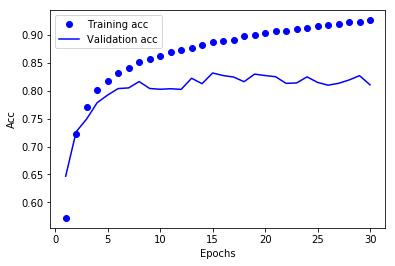

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [7]:
network.predict_classes(train_set[10].reshape((1,784)))
train_set[10]
cv2.imshow('aa', train_set[0].reshape((28,28)))

In [24]:
from preprocessing import reshape
from classifier import map_label_to_name
letter = reshape('processed/l00_06.bmp')
prediction = network.predict_classes((letter.reshape((1,784))/255).astype('float32'))
map_label_to_name(prediction[0])

'W'

In [79]:
#save network to file
model_json = network.to_json()
with open("modej.json", "w") as json_file:
    json_file.write(model_json)
network.save_weights("model.h5")